<NIDAQmxInstrument Device:Dev1 PN:USB-6002 SN:29046721>
daq.ai0.value: 1.608V
daq.ai1.value: 2.737V
daq.ai2.value: 0.438V
daq.ai3.value: 0.203V
ai0.value: 1.867V


Text(0, 0.5, 'Magnitud')

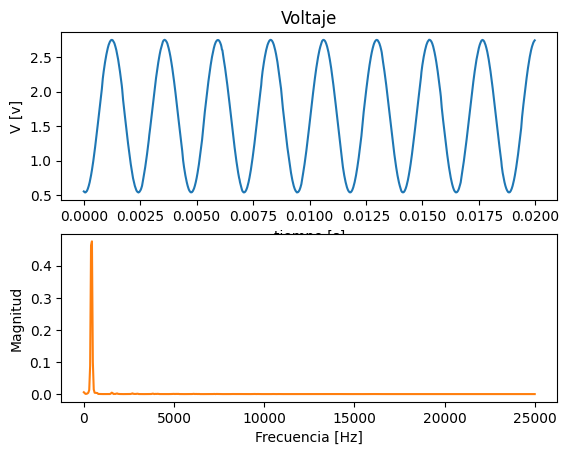

In [23]:
from daqmx import NIDAQmxInstrument, AnalogInput
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import numpy as np
import time 
from daqmx import NIDAQmxInstrument, AnalogInput
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import numpy as np
import time 
from optparse import OptionParser   # para desempaquetar o armar las opciones

# tested with NI USB-6001
# which has the following analog inputs:
#  - ai0
#  - ai1
#  - ai2
#  - ai3

# first, we allocate the hardware using the automatic hardware
# allocation available to the instrument; this is safe when there
# is only one NIDAQmx instrument, but you may wish to specify a
# serial number or model number for a safer experience



daq = NIDAQmxInstrument()

print(daq)

# the easiest way to get a single sample is to select the analog input
# attribute on the daq and interrogate its `value` attribute
print(f'daq.ai0.value: {daq.ai0.value:.3f}V')
print(f'daq.ai1.value: {daq.ai1.value:.3f}V')
print(f'daq.ai2.value: {daq.ai2.value:.3f}V')
print(f'daq.ai3.value: {daq.ai3.value:.3f}V')

# you will start throwing errors if you interrogate
# inputs that don't exist on the device (uncomment to see!)
#print(f'daq.ai4.value: {daq.ai4.value:.3f}V')

# for more nuanced control over the analog
# input, we could use the `capture` method
nSamples=1000
samplingRate=50000

values = daq.ai1.capture(
    sample_count=nSamples, rate=samplingRate,
    max_voltage=10.0, min_voltage=-10.0,
    mode='differential', timeout=30.0
)
#modos de entrada analógica
# 'differential',
#        'pseudo-differential', 'single-ended referenced',
#        'single-ended non-referenced'

#print(f'values: {values} V')

# note that the values come back as type `numpy.ndarray`
#print(f'type(values): {type(values)}')

# if you already know your device name, you might be
# happier going straight to the `AnalogInput` constructor:
ai0 = AnalogInput(device='Dev1', analog_input='ai0')

# we can do anything that we could have
# done previously with the daq.aiX
print(f'ai0.value: {ai0.value:.3f}V')


t=np.arange(0,nSamples*(1/samplingRate),1/samplingRate)

f= open("Datos nidaq.txt","w+")
i=0
for i in range(len(values)):
     f.write(str(i*(1/samplingRate)))
     f.write(",")
     f.write(str(round(values[i],3)))
     f.write("\n")
     i=i+1
f.close() 



fig, (ax1,ax2) = plt.subplots(2,sharex=False, sharey=False)
#fig.suptitle('Analisis frecuencial')

ax1.plot(t,values)
ax1.set_title('Voltaje')
ax1.set_xlabel('tiempo [s]')
ax1.set_ylabel('V [v]')



ax2.magnitude_spectrum(values-values.mean(),Fs=samplingRate, color='C1')

#ax1.psd(adc, NFFT=NFFT, Fs=samplingRate, detrend=plb.detrend_mean)

#ax2.set_title('PSD')
ax2.set_xlabel('Frecuencia [Hz]')
ax2.set_ylabel('Magnitud')


